In [25]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Question 1

In [2]:
# In Python 3, write a simple program below that calculates the probability of 5% percent of a population having diabetes. 
# You can use this [report to collect probabilites](https://www.clinicaladvisor.com/diabetes-resource-center/cdc-report-diabetes-by-type-us-adults/article/760827/).

def probability_diabetes(population):
    prob = 0.0858 + 0.0055 + 0.0031
    return stats.binom.pmf(k = 0.05 * population, n = population, p = prob)
    
    

In [3]:
probability_diabetes(10000)

6.0977125129394605e-62

### Question 2 

In [4]:
df_diabetes = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [5]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
print(df_diabetes.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [7]:
df_diabetes[['time_in_hospital','diag_1','diag_2', 'diag_3' ]].head()

,time_in_hospital,diag_1,diag_2,diag_3
0,1,250.83,?,?
1,3,276,250.01,255
2,2,648,250,V27
3,2,8,250.43,403
4,1,197,157,250


In [8]:
df_diabetes.iloc[0]

encounter_id                                 2278392
patient_nbr                                  8222157
race                                       Caucasian
gender                                        Female
age                                           [0-10)
weight                                             ?
admission_type_id                                  6
discharge_disposition_id                          25
admission_source_id                                1
time_in_hospital                                   1
payer_code                                         ?
medical_specialty           Pediatrics-Endocrinology
num_lab_procedures                                41
num_procedures                                     0
num_medications                                    1
number_outpatient                                  0
number_emergency                                   0
number_inpatient                                   0
diag_1                                        

In [9]:
df_ids = pd.read_csv("dataset_diabetes/IDs_mapping.csv")
df_admissions_type = df_ids.iloc[0:4]
df_admissions_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn


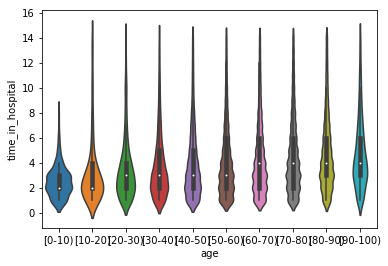

In [10]:
sns.violinplot(x='age', y='time_in_hospital', data=df_diabetes)

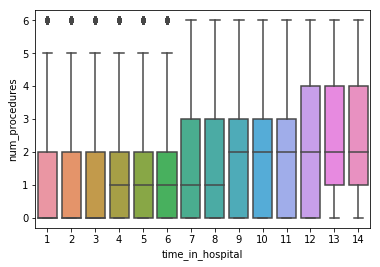

In [11]:
sns.boxplot(x='time_in_hospital', y='num_procedures', data=df_diabetes)

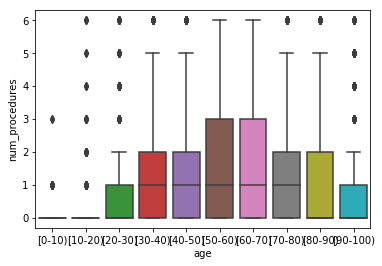

In [12]:
sns.boxplot(x='age', y='num_procedures', data=df_diabetes)

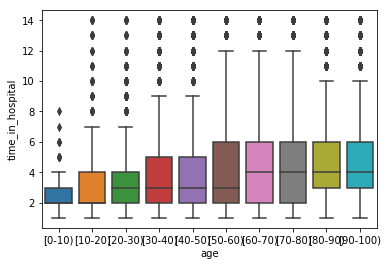

In [13]:
sns.boxplot(x='age', y='time_in_hospital', data=df_diabetes)

In [14]:
df_classifier = df_diabetes[['age', 'admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_medications']]
df_classifier.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications
0,[0-10),6,25,1,1,41,1
1,[10-20),1,1,7,3,59,18
2,[20-30),1,1,7,2,11,13
3,[30-40),1,1,7,2,44,16
4,[40-50),1,1,7,1,51,8


In [15]:
df_diabetes.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [16]:
df_classifier['age'][0]

'[0-10)'

In [17]:
df_classifier['age_num'] = [re.findall(r'\d+',age) for age in df_classifier['age']]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_classifier.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,age_num
0,[0-10),6,25,1,1,41,1,"[0, 10]"
1,[10-20),1,1,7,3,59,18,"[10, 20]"
2,[20-30),1,1,7,2,11,13,"[20, 30]"
3,[30-40),1,1,7,2,44,16,"[30, 40]"
4,[40-50),1,1,7,1,51,8,"[40, 50]"


In [19]:
df_classifier['age'] = [int(age[0]) for age in df_classifier['age_num']]
df_classifier.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,age_num
0,0,6,25,1,1,41,1,"[0, 10]"
1,10,1,1,7,3,59,18,"[10, 20]"
2,20,1,1,7,2,11,13,"[20, 30]"
3,30,1,1,7,2,44,16,"[30, 40]"
4,40,1,1,7,1,51,8,"[40, 50]"


In [20]:
df_classifier = df_classifier.drop(['age_num'],axis=1)
df_classifier.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications
0,0,6,25,1,1,41,1
1,10,1,1,7,3,59,18
2,20,1,1,7,2,11,13
3,30,1,1,7,2,44,16
4,40,1,1,7,1,51,8


In [21]:
df_classifier.dtypes

age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_medications             int64
dtype: object

### Question 3

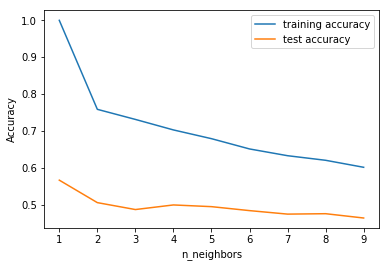

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_classifier, df_classifier['time_in_hospital'], test_size=0.2)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [23]:
# Best performance is around 4 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.50


In [30]:
# Using Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.789
